In [24]:
# imports
import numpy as np
import pandas as pd
import glob
import mediapipe as mp # for hand detection
import cv2 # for capturing videos
import pickle # to save the model
import argparse
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as pl
from PIL import Image
from tqdm import tqdm

In [25]:
# CONSTANTS
IMG_WIDTH = 300
IMG_HEIGHT = 300

In [26]:
# load the hands coordinates from the 300_300_AfC dataset
file_name = os.path.join(".", "pickle_data", "300_300_AfC_hands_coordinates_21_landmarks.pickle")
with open(file_name, "rb") as f:
    hands_300_300_AfC = pickle.load(f)

In [27]:
frames_with_hands_AfC = 0
frames_with_both_hands_AfC = 0

for hand in hands_300_300_AfC:
    if hand[1] != None or hand[2] != None:
        frames_with_hands_AfC += 1
    if hand[1] != None and hand[2] != None:
        frames_with_both_hands_AfC += 1

print("Results for the 300_300_AfC dataset : ")
print("Percentage of frames with at least one hand detected : ", frames_with_hands_AfC/len(hands_300_300_AfC)*100, "%")
print("Percentage of frames with both hands detected : ", frames_with_both_hands_AfC/len(hands_300_300_AfC)*100, "%")

Results for the 300_300_AfC dataset : 
Percentage of frames with at least one hand detected :  70.64108790675085 %
Percentage of frames with both hands detected :  21.834455005897453 %


In [28]:
# load the hands coordinates from the 300_300_AfP dataset
file_name = os.path.join(".", "pickle_data", "300_300_AfP_hands_coordinates_21_landmarks.pickle")
with open(file_name, "rb") as f:
    hands_300_300_AfP = pickle.load(f)

In [29]:
frames_with_hands_AfP = 0
frames_with_both_hands_AfP = 0

for hand in hands_300_300_AfP:
    if hand[1] != None or hand[2] != None:
        frames_with_hands_AfP += 1
    if hand[1] != None and hand[2] != None:
        frames_with_both_hands_AfP += 1

print("Results for the 300_300_AfP dataset : ")
print("Percentage of frames with at least one hand detected : ", frames_with_hands_AfP/len(hands_300_300_AfP)*100, "%")
print("Percentage of frames with both hands detected : ", frames_with_both_hands_AfP/len(hands_300_300_AfP)*100, "%")

Results for the 300_300_AfP dataset : 
Percentage of frames with at least one hand detected :  42.562270172760705 %
Percentage of frames with both hands detected :  8.707416915284814 %


In [30]:
# merge results of hand detection and tracking of all frames sizes

# check for each frame if there is a hand detected with the 300_300_AfC model or the 300_300_AfP model and replace None values with the coordinates of the hand detected
hands_300_300_AfC_AfP = []

# ensure that the coordinates lists have the same length
if len(hands_300_300_AfC) != len(hands_300_300_AfP):
    print("Error : the coordinates lists have different lengths")
    exit()
else:
    print("The coordinates lists have the same length, merging can start")

    # iterate through each frame
    for i in tqdm(range(len(hands_300_300_AfC))):
        frame_landmarks = [i]

        # iterate through each hand
        
        if hands_300_300_AfC[i][1] is not None and hands_300_300_AfC[i][2] is not None:
            frame_landmarks.append(hands_300_300_AfC[i][1])
            frame_landmarks.append(hands_300_300_AfC[i][2])
        
        elif hands_300_300_AfC[i][1] is not None and hands_300_300_AfC[i][2] is None:
            frame_landmarks.append(hands_300_300_AfC[i][1])
            if hands_300_300_AfP[i][2] is not None:
                frame_landmarks.append(hands_300_300_AfP[i][2])
            else:
                frame_landmarks.append(None)

        elif hands_300_300_AfC[i][1] is None and hands_300_300_AfC[i][2] is not None:
            if hands_300_300_AfP[i][1] is not None:
                frame_landmarks.append(hands_300_300_AfP[i][1])
            else:
                frame_landmarks.append(None)
            frame_landmarks.append(hands_300_300_AfC[i][2])

        elif hands_300_300_AfC[i][1] is None and hands_300_300_AfC[i][2] is None:
            if hands_300_300_AfP[i][1] is not None and hands_300_300_AfP[i][2] is not None:
                frame_landmarks.append(hands_300_300_AfP[i][1])
                frame_landmarks.append(hands_300_300_AfP[i][2])
            elif hands_300_300_AfP[i][1] is not None and hands_300_300_AfP[i][2] is None:
                frame_landmarks.append(hands_300_300_AfP[i][1])
                frame_landmarks.append(None)
            elif hands_300_300_AfP[i][1] is None and hands_300_300_AfP[i][2] is not None:
                frame_landmarks.append(None)
                frame_landmarks.append(hands_300_300_AfP[i][2])
            else:
                frame_landmarks.append(None)
                frame_landmarks.append(None)

        hands_300_300_AfC_AfP.append(frame_landmarks)

The coordinates lists have the same length, merging can start


100%|██████████| 28826/28826 [00:00<00:00, 508333.15it/s]


In [31]:
print(len(hands_300_300_AfC_AfP))

28826


In [32]:
print(type(hands_300_300_AfC_AfP[8][1]))

<class 'NoneType'>


In [33]:
print(hands_300_300_AfC_AfP[9][1])

[[0.8451259732246399, 0.4619797170162201, 6.931760765382933e-08], [0.8070888519287109, 0.4418967366218567, -0.006840565241873264], [0.7647498846054077, 0.4398465156555176, -0.004821724258363247], [0.7330710887908936, 0.4490292966365814, -0.0043718148954212666], [0.7070979475975037, 0.460661381483078, -0.003272279864177108], [0.7332988381385803, 0.4511129558086395, 0.023969115689396858], [0.6986210942268372, 0.45946717262268066, 0.023774877190589905], [0.6806889176368713, 0.4686180353164673, 0.01786000281572342], [0.6677020788192749, 0.4766748547554016, 0.012798436917364597], [0.7386860251426697, 0.4690307378768921, 0.022528985515236855], [0.7006969451904297, 0.4760129749774933, 0.023023582994937897], [0.6808945536613464, 0.48298779129981995, 0.015384075231850147], [0.6640608310699463, 0.48877865076065063, 0.009465804323554039], [0.7487149238586426, 0.4854852557182312, 0.017478637397289276], [0.7108212113380432, 0.49138835072517395, 0.015335915610194206], [0.6900123953819275, 0.49574035

In [34]:
# multiply the x and y coordinates of all landmarks by 300 to get the coordinates in the original frame size
for i in tqdm(range(len(hands_300_300_AfC_AfP))):
    for j in range(1, 3): # iterate through each hand
        if hands_300_300_AfC_AfP[i][j] is not None:
            for k in range(21): # iterate through each landmark
                if hands_300_300_AfC_AfP[i][j] is not None:
                    hands_300_300_AfC_AfP[i][j][k][0] = round(float(hands_300_300_AfC_AfP[i][j][k][0]) * IMG_WIDTH, 4)
                    hands_300_300_AfC_AfP[i][j][k][1] = round(float(hands_300_300_AfC_AfP[i][j][k][1]) * IMG_WIDTH, 4)

100%|██████████| 28826/28826 [00:02<00:00, 13936.68it/s]


In [35]:
print(hands_300_300_AfC_AfP[9][1])

[[253.5378, 138.5939, 6.931760765382933e-08], [242.1267, 132.569, -0.006840565241873264], [229.425, 131.954, -0.004821724258363247], [219.9213, 134.7088, -0.0043718148954212666], [212.1294, 138.1984, -0.003272279864177108], [219.9897, 135.3339, 0.023969115689396858], [209.5863, 137.8402, 0.023774877190589905], [204.2067, 140.5854, 0.01786000281572342], [200.3106, 143.0025, 0.012798436917364597], [221.6058, 140.7092, 0.022528985515236855], [210.2091, 142.8039, 0.023023582994937897], [204.2684, 144.8963, 0.015384075231850147], [199.2182, 146.6336, 0.009465804323554039], [224.6145, 145.6456, 0.017478637397289276], [213.2464, 147.4165, 0.015335915610194206], [207.0037, 148.7221, 0.009957888163626194], [201.7511, 149.8356, 0.005938210058957338], [228.842, 150.599, 0.01097184419631958], [219.7145, 152.2086, 0.008432009257376194], [214.174, 152.7391, 0.007065905723720789], [208.7928, 152.8007, 0.005871167406439781]]


In [36]:
frames_with_hands = 0
frames_with_both_hands = 0

for hand in hands_300_300_AfC_AfP:
    if hand[1] != None or hand[2] != None:
        frames_with_hands += 1
    if hand[1] != None and hand[2] != None:
        frames_with_both_hands += 1

print("Percentage of frames with at least one hand detected : ", frames_with_hands/len(hands_300_300_AfC_AfP)*100, "%")
print("Percentage of frames with both hands detected : ", frames_with_both_hands/len(hands_300_300_AfC_AfP)*100, "%")

Percentage of frames with at least one hand detected :  76.70852702421425 %
Percentage of frames with both hands detected :  25.678207174078953 %


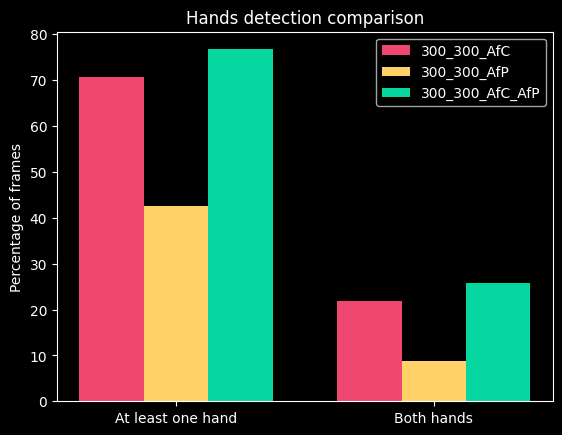

In [40]:
# plot results to compare the 3 datasets

x = ["At least one hand", "Both hands"]
y_300_300_AfC = [frames_with_hands_AfC/len(hands_300_300_AfC)*100, frames_with_both_hands_AfC/len(hands_300_300_AfC)*100]
y_300_300_AfP = [frames_with_hands_AfP/len(hands_300_300_AfP)*100, frames_with_both_hands_AfP/len(hands_300_300_AfP)*100]
y_300_300_AfC_AfP = [frames_with_hands/len(hands_300_300_AfC_AfP)*100, frames_with_both_hands/len(hands_300_300_AfC_AfP)*100]

x_positions = np.arange(len(x))
width = 0.25

pl.bar(x_positions - width, y_300_300_AfC, color="#ef476f", width=width)
pl.bar(x_positions, y_300_300_AfP, color="#ffd166", width=width)
pl.bar(x_positions + width, y_300_300_AfC_AfP, color="#06d6a0", width=width)

pl.xticks(x_positions, x)
pl.ylabel("Percentage of frames")
pl.title("Hands detection comparison")
pl.legend(["300_300_AfC", "300_300_AfP", "300_300_AfC_AfP"])
pl.show()

In [38]:
# save the total hands coordinates to a pickle file in the pickle_files folder
file_name = os.path.join(".", "pickle_data", "300_300_AfC_AfP_hands_coordinates_21_landmarks.pickle")
with open(file_name, "wb") as f:
    pickle.dump(hands_300_300_AfC_AfP, f)

In [39]:
# load the hands coordinates from the pickle file
file_name = os.path.join(".", "pickle_data", "300_300_AfC_AfP_hands_coordinates_21_landmarks.pickle")
with open(file_name, "rb") as f:
    hands = pickle.load(f)

# display the hands coordinates
hands

[[0,
  [[203.678, 215.0048, 2.0850416149187367e-07],
   [201.9033, 205.3035, 0.004473347682505846],
   [196.5171, 195.1516, 0.006036499049514532],
   [191.7402, 188.7383, 0.005319010931998491],
   [188.219, 183.4591, 0.0038206814788281918],
   [195.5639, 194.5877, 0.002629668451845646],
   [189.9175, 183.8406, -0.0069520906545221806],
   [185.9305, 175.2332, -0.014755076728761196],
   [182.4908, 168.4838, -0.01992180198431015],
   [194.1577, 194.4168, -0.005564892198890448],
   [187.8342, 181.7611, -0.014680745080113411],
   [183.0777, 172.2711, -0.02269960567355156],
   [178.5262, 163.9938, -0.028351115062832832],
   [192.2044, 195.2947, -0.014078854583203793],
   [186.5482, 182.9543, -0.02173532545566559],
   [183.351, 173.7823, -0.027611026540398598],
   [180.3378, 166.1863, -0.03172048181295395],
   [189.8526, 197.0832, -0.022334376350045204],
   [186.6848, 187.9192, -0.027938470244407654],
   [184.999, 181.1177, -0.030382338911294937],
   [183.4057, 175.4153, -0.03252025693655014]